## PYTHON-13. Задания по Визуализаций данных.

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

In [57]:
# загружаем данные из датасети
df = pd.read_csv('churn.zip', sep=',')

In [58]:
# смотрим пять первый и последне строк
display(df.head())
print('\n')
display(df.tail())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
# смотрим размеры наши дата
df.shape

(10000, 14)

In [5]:
# смотрим основные информации о таблице 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# основные статистические данны
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


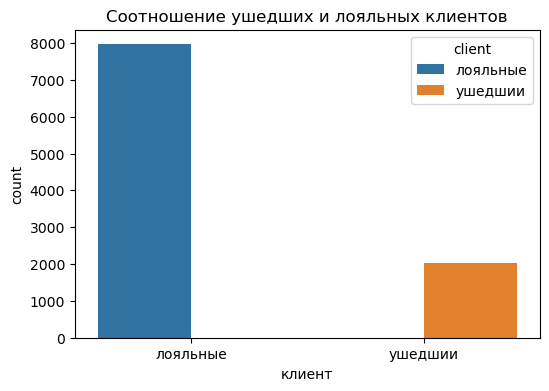

In [8]:
# создаем функция get_client который будет Переведите числовой признак Exited в категориальный, 
# и создаем новый признак client
def get_client(args):
    if args == 1:
        return 'ушедшии'
    else:
        return 'лояльные'
    
df['client']=df['Exited'].apply(get_client) # новый признак
count_client=df['client'].value_counts().reset_index() 
count_client.columns=['client', 'count']  

fig = plt.figure(figsize=(6, 4))
barplot= sns.barplot(
    data=count_client, 
    x='client', 
    y='count',
    hue='client',
) 
barplot.set_title('Соотношение ушедших и лояльных клиентов');
barplot.set_xlabel('клиент'); 


*Вывод: на данном графике представлена доля ушедших (20.4%) и оставшихся клиентов (79.6%) банка от общего числа всех клиентов.*

*9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.*

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


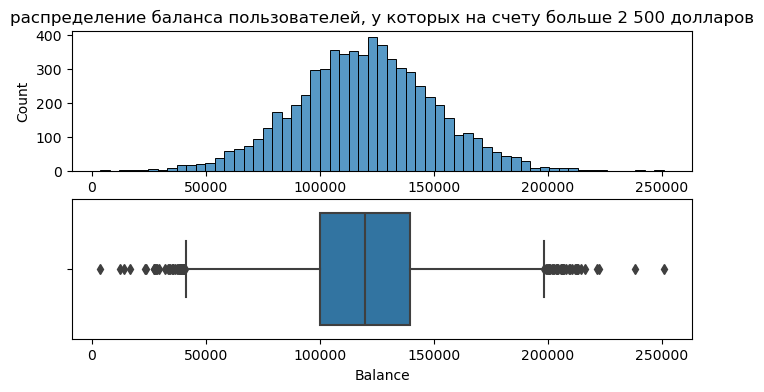

In [30]:
balance=df[df['Balance'] > 2500]
fig, axes=plt.subplots(nrows=2, ncols=1, figsize=(8, 4))
sns.histplot(
    data=balance,
    x='Balance',
    ax=axes[0]
);
axes[0].set_title('распределение баланса пользователей, у которых на счету больше 2 500 долларов')

sns.boxplot(
    data=balance,
    x='Balance',
    orient='h',
    ax=axes[1]
);
#axes[1].set_title('распределение баланса пользователей, у которых на счету больше 2 500 долларов')

*здесь можно делать вывод: что медиан зп это 119.8397k а минимальная 3,768.69k а максимальное 250.8981k, и распределение похоже на нормальное.*

*9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.*

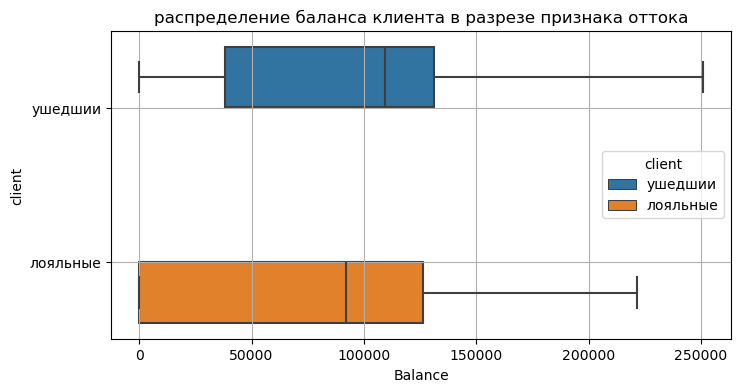

In [31]:
fig=plt.figure(figsize=(8, 4))
boxplot=sns.boxplot(
    data=df,
    x='Balance',
    y='client',
    orient='h',
    hue='client'
)
boxplot.set_title('распределение баланса клиента в разрезе признака оттока')
boxplot.grid()

*Вывод: Мы видим большое смещение лояльных клиентов к нулю, это вызвано большим количеством клиентов с нулевым балансом*

*9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?*

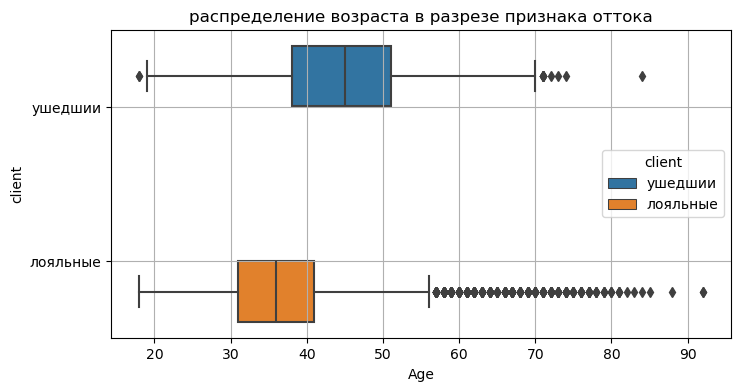

In [32]:
fig=plt.figure(figsize=(8, 4))
boxplot=sns.boxplot(
    data=df,
    x='Age',
    y='client',
    orient='h',
    hue='client'
)
boxplot.set_title('распределение возраста в разрезе признака оттока')
boxplot.grid()

*Вывод: из данного графика видно, что возрастные характеристики двух групп клиентов отличаются. У лояльных клиентов средний возраст 36 лет. Однако у лояльных клиентов присутствует большое количество выбросов, максимальное возраст это 92. У группы ушедших клиентов средний возраст по выше 45 лет, да и в целом люди этой группы будут по старше, однако выбросов здесь наблюдается гораздо меньше. Не сомненно банку необходимо обратить внимание на категорию клиентов 40+ и предложить им интересные условия сотрудничества.*

*9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.*

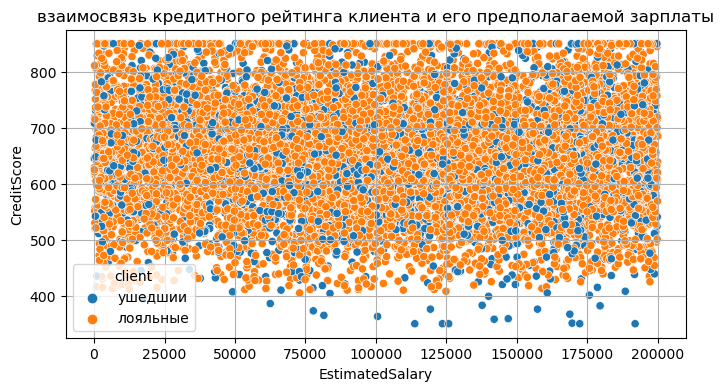

In [33]:
fig=plt.figure(figsize=(8, 4))
scatter_plot=sns.scatterplot(
    data=df,
    x = 'EstimatedSalary',
    y = 'CreditScore',
    hue='client'
)
scatter_plot.set_title('взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
scatter_plot.grid()

*вывод:Вывод: На представленной диаграмме точки разбросаны хаотично, что означает отсутствие взаимосвязей между предполгаемой заработной платой и кредитным рейтингом. Зависимость признака оттока от  кредитного рейтинга клиента и его предполагаемой зарплаты так же определить невозможно*

*9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.*

Text(0.5, 1.0, 'Соотношение мужчин и женщин среди ушедших клиентов')

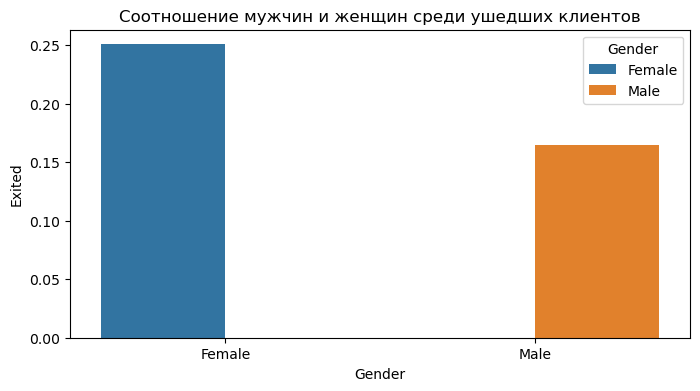

In [36]:
df_gender = df.groupby('Gender', as_index=False)['Exited'].mean()
fig=plt.figure(figsize=(8, 4))
barplot=sns.barplot(
    data=df_gender,
    x='Gender',
    y='Exited',
    hue='Gender'
)
barplot.set_title('Соотношение мужчин и женщин среди ушедших клиентов')

*Вывод: из данного графика видно, что чаще уходят женщины.*

*9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.*

Text(0.5, 1.0, 'Зависимость оттока клиентов от выбранных услуг')

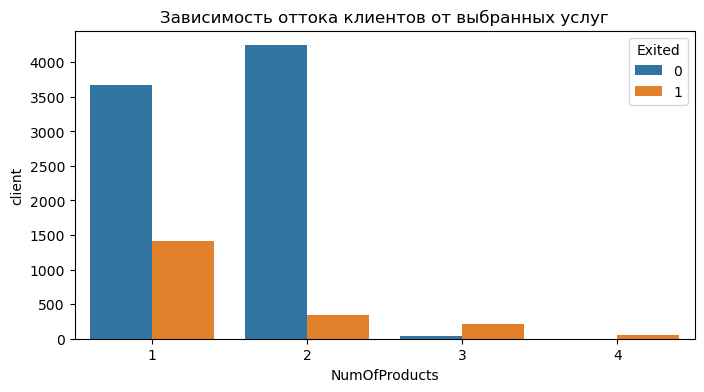

In [45]:
df_client = df.groupby(['NumOfProducts', 'Exited'], as_index=False)['client'].count()
fig=plt.figure(figsize=(8, 4))
barplot=sns.barplot(
    data=df_client,
    x='NumOfProducts',
    y='client',
    hue='Exited'
)
barplot.set_title('Зависимость оттока клиентов от выбранных услуг')


*Вывод: из графика видно, что 1 и 2 услуги самые популярные (причем что у лояльных пользователей, что у ушедших). 3 и 4 услуги являются не популярными, причем ушедших клиентов, пользовавшихся 3 услугой больше, чем лояльных клиентов, а 4 услугой вообще не пользуются действующие клиенты. Нужно поработь над спектром предлагаемых услуг 3 и 4 для действующих клиентов, а 1 и 2 для удержания.*

*9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?*

Text(0.5, 1.0, 'Зависимость оттока клиентов от выбранных услуг')

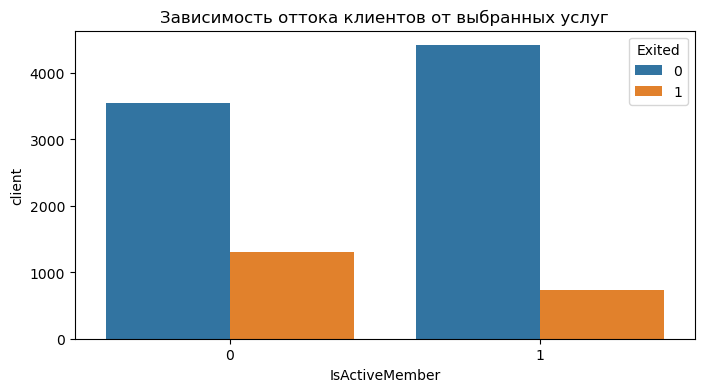

In [44]:
df_status = df.groupby(['IsActiveMember', 'Exited'], as_index=False)['client'].count()
fig=plt.figure(figsize=(8, 4))
barplot=sns.barplot(
    data=df_status,
    x='IsActiveMember',
    y='client',
    hue='Exited'
)
barplot.set_title('Зависимость оттока клиентов от выбранных услуг')

*Вывод: исходя из графика можно сделать вывод, что клиентов, у которых есть статус активный больше. А вот ушедших клиентов больше именно тех, у которых статуса нет.*

*9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.*

In [46]:
df_geo = df.groupby('Geography', as_index=False)['Exited'].mean()
fig = px.choropleth(
    data_frame=df_geo,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 0.3],
    title='Средний отток клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

*Вывод: судя по графику отток клиентов в Германии в 2 раза больше, чем в Испании и Франции. Можно предположить, что это связано с большой конкуренцией (большое количество банков) и возможно с небольшим выбором услуг, поэтому клиенты перемещаются между банками в поисках более выгодных условий.*

*9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.*

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


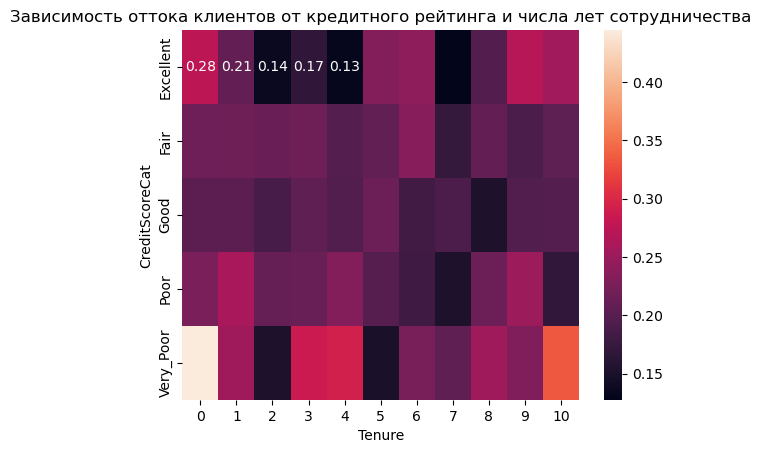

In [55]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)
pivot = df.pivot_table(
    values='Exited',    
    index='CreditScoreCat',
    columns='Tenure',
)

fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

display(pivot)

*Вывод: Отток клиентов, практически по всем категориям кредитного рейтинга находится в пределах 20-23% (где-то даже меньше), от общего числа клиентов по каждой категории. Но конечно же стоит обратить свое внимание на величины более 23%, данные ячейки окрашены в более яркий оттенок. Наибольший отток находится в категории "Very_Poor", здесь достаточно высокие показатели для клиентов по срокам 1, 3, 4, 8, 10 . Необходимо присмотреться к цифрам и предложить клиентам данных категорий более выгодные условия.*